# Loan Data from Prosper

<br>
<center><b>By Abdelrhman Ragab Nady</b></center>



## Preliminary Wrangling

>This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
Data = pd.read_csv('../input/prosperloandata/prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(Data.shape)

(113937, 81)


In [4]:
features = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate','StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', "ProsperScore",
        'EmploymentStatus','ListingCreationDate','Occupation','AvailableBankcardCredit','CreditGrade',"DebtToIncomeRatio"]
selected_data = Data[features]

In [5]:
selected_data.head()

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (Alpha),ProsperScore,EmploymentStatus,ListingCreationDate,Occupation,AvailableBankcardCredit,CreditGrade,DebtToIncomeRatio
0,9425,0.16516,0.1580,3083.333333,36,NaN,NaN,Self-employed,2007-08-26 19:09:29.263000000,Other,1500.0,C,0.17
1,10000,0.12016,0.0920,6125.000000,36,A,7.0,Employed,2014-02-27 08:28:07.900000000,Professional,10266.0,NaN,0.18
2,3001,0.28269,0.2750,2083.333333,36,NaN,NaN,Not available,2007-01-05 15:00:47.090000000,Other,NaN,HR,0.06
3,10000,0.12528,0.0974,2875.000000,36,A,9.0,Employed,2012-10-22 11:02:35.010000000,Skilled Labor,30754.0,NaN,0.15
4,15000,0.24614,0.2085,9583.333333,36,D,4.0,Employed,2013-09-14 18:38:39.097000000,Executive,695.0,NaN,0.26


### What is the structure of your dataset?

>The dataset has 113,937 loans with 81 variables on each loan. I will be interested in a subset of those variables including loan amount, borrower rate, Borrower APR, current loan status, borrower income, and many others. Variables are loan information and borrower information.

### What is/are the main feature(s) of interest in your dataset?

>I'm most interested in figuring out what features are best for predicting borrower's Annual Percentage Rate (Borrower APR) for the loan and affecting the loan status.






### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I guess that the total loan amount will have a great effect on the APR of the loan which the most larger the total loan amount, the most the lower the APR. I also guess that the borrowers stated monthly income, loan term, Prosper rating, employment status will also have effects on the APR.

>I also guess I need to invest and find in ListingCreationDate and some borrower information such as Occupation,  AvailableBankcardCredit, CreditGrade, StatedMonthlyIncome, and  DebtToIncomeRatio which will also have effects on the borrower's Annual Percentage Rate and loan status.

**How Many Missing in the Data Set?**

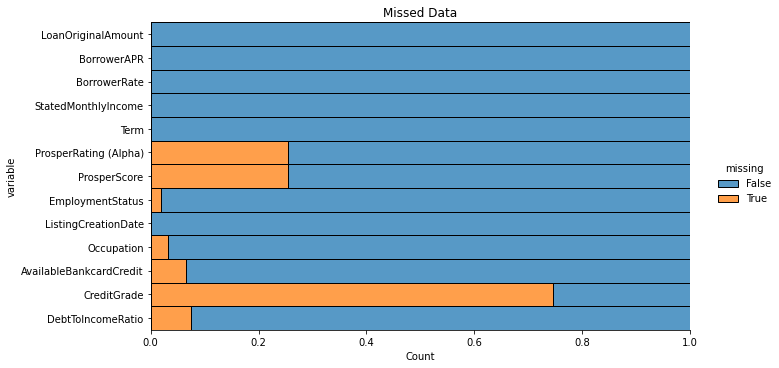

In [6]:
sns.displot(
    data=selected_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
);
plt.title('Missed Data');


>we have a greatly missed data in **Credit Grade** so maybe result of analysis of this feature isn't accurate, **ProsperRating (Alpha)**,	**ProsperScore EmploymentStatus**, **DebtToIncomeRatio**, **Occupation**, and **AvailableBankcardCredit** all of these columns contain nulls value  

In [7]:
# descriptive statistics for numeric variables
selected_data.describe()

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,ProsperScore,AvailableBankcardCredit,DebtToIncomeRatio
count,113937.00000,113912.000000,113937.000000,1.139370e+05,113937.000000,84853.000000,106393.000000,105383.000000
mean,8337.01385,0.218828,0.192764,5.608026e+03,40.830248,5.950067,11210.225447,0.275947
std,6245.80058,0.080364,0.074818,7.478497e+03,10.436212,2.376501,19818.361309,0.551759
min,1000.00000,0.006530,0.000000,0.000000e+00,12.000000,1.000000,0.000000,0.000000
25%,4000.00000,0.156290,0.134000,3.200333e+03,36.000000,4.000000,880.000000,0.140000
50%,6500.00000,0.209760,0.184000,4.666667e+03,36.000000,6.000000,4100.000000,0.220000
75%,12000.00000,0.283810,0.250000,6.825000e+03,36.000000,8.000000,13180.000000,0.320000
max,35000.00000,0.512290,0.497500,1.750003e+06,60.000000,11.000000,646285.000000,10.010000


## Univariate Exploration

In [8]:
# Convert ProsperRating to an ordered type
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = rate_order)
selected_data.loc[:,'ProsperRating (Alpha)'] = selected_data.loc[:,'ProsperRating (Alpha)'].astype(ordered_var, copy=True)

In [9]:

# Convert  Employment status to an ordered type
emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = emp_order)
selected_data.loc[:,'EmploymentStatus'] = selected_data.loc[:,'EmploymentStatus'].astype(ordered_var, copy=True)



I'll start by looking at the distribution of the main variable of interest: **employment status**.

>**Employment Status** : The employment status of the borrower at the time they posted the listing.

In [10]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]

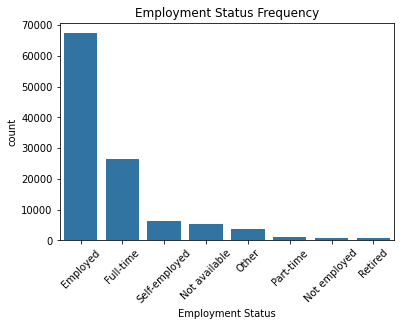

In [11]:
# Plot the Employment Status 
type_order = selected_data['EmploymentStatus'].value_counts().index
sns.countplot(data=selected_data, x='EmploymentStatus', color=base_color, order=type_order);
plt.xticks(rotation = 45);
plt.xlabel('Employment Status');
plt.title('Employment Status Frequency');

>Comman borrowers indicate **“Employed”** and **“Full-Time”** as employment status.
<hr /> 

Next up, the first predictor variable of interest: Term.
>**Term**: The length of the loan expressed in months.

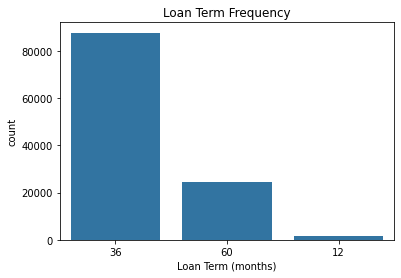

In [12]:
# Plot the Term 
type_order = selected_data['Term'].value_counts().index
sns.countplot(data=selected_data, x='Term', color=base_color, order=type_order);
plt.xlabel('Loan Term (months)');
plt.title('Loan Term Frequency');

>The length of most Common of the loans are 36 months Then it was followed by a long distance of 60 months which there were significantly fewer loans for 60-month terms and almost none for 12-month terms.
Actually, this affects directly in Borrower Rate
<hr /> 

Next up, the first predictor variable of interest: Prosper Rating.


>**ProsperRating (Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.  

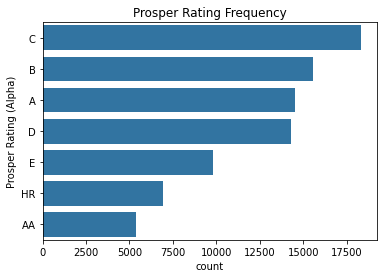

In [13]:
# Plot the Prosper Rating 
type_order = selected_data['ProsperRating (Alpha)'].value_counts().index
sns.countplot(data=selected_data, y='ProsperRating (Alpha)', color=base_color, order=type_order);
plt.ylabel('Prosper Rating (Alpha)');
plt.title('Prosper Rating Frequency');

>The ratings of most common of the borrowers are among C to D

Next up, the first predictor variable of interest: BorrowerAPR and BorrowerRate
>**BorrowerAPR** : The Borrower's Annual Percentage Rate (APR) for the loan.<br/>
>**BorrowerRate** : The Borrower's interest rate for this loan. 

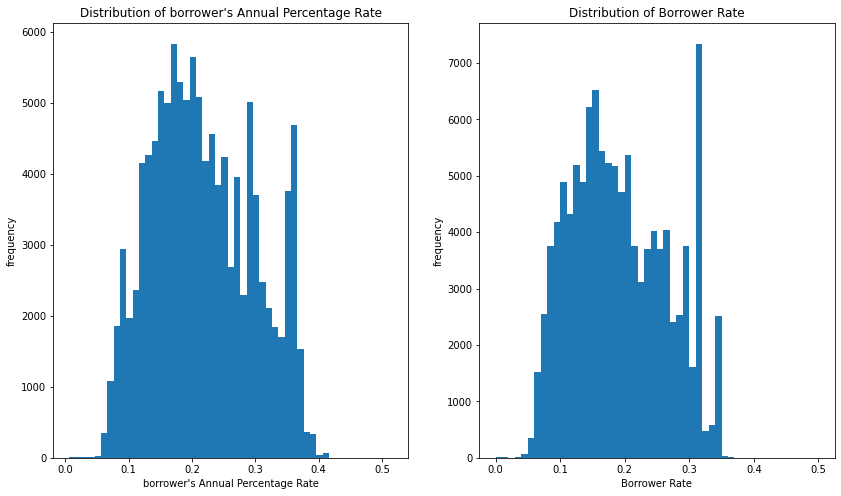

In [14]:
plt.subplots(figsize = [14,8])
plt.subplot(1, 2, 1)
apr_bins = np.arange(selected_data.BorrowerAPR.min(), selected_data.BorrowerAPR.max()+0.01, 0.01)
plt.hist(data=selected_data, x='BorrowerAPR', bins=apr_bins);
plt.xlabel('borrower\'s Annual Percentage Rate');
plt.title('Distribution of borrower\'s Annual Percentage Rate');

plt.ylabel('frequency');
# Plot the distribution of BorrowerRate
plt.subplot(1, 2, 2)
rate_bins = np.arange(selected_data['BorrowerRate'].min(), selected_data.BorrowerRate.max()+0.01, 0.01)
plt.hist(data=selected_data, x='BorrowerRate', bins=rate_bins)
plt.xlabel('Borrower Rate');
plt.ylabel('frequency');
plt.title('Distribution of Borrower Rate');

>Both distributions are multimodal which the distributions are a normal distribution than skewed right.
Borrower Rate and borrower's Annual Percentage Rate are similar but we considered that borrower's Annual Percentage Rate contain some fees (such as discount points, most closing costs, mortgage insurance, and loan origination fees) of course them affect on the total cost of loan.
<br/><br/>
**So that borrower's Annual Percentage Rate greater than Borrower Rate**

>Next up, the first predictor variable of interest: ProsperScore<br><br>
**ProsperScore**: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

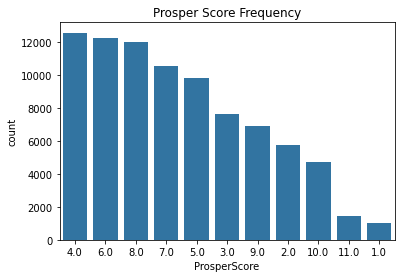

In [15]:
type_order = selected_data['ProsperScore'].value_counts().index
sns.countplot(data=selected_data, x='ProsperScore', color=base_color, order=type_order);
plt.xlabel('ProsperScore');
plt.title('Prosper Score Frequency');

>It's observed that degree of risk between **0.4 : 0.8** It's not good but also not bad which the most common rate is **0.4** this so interesting.
<br><br>
It's observed that we find rate value equal 11.0 it's out of range. This 

>Next up, the first predictor variable of interest: Occupation
<br/><br/>
Occupation: The Occupation selected by the Borrower at the time they created the listing.

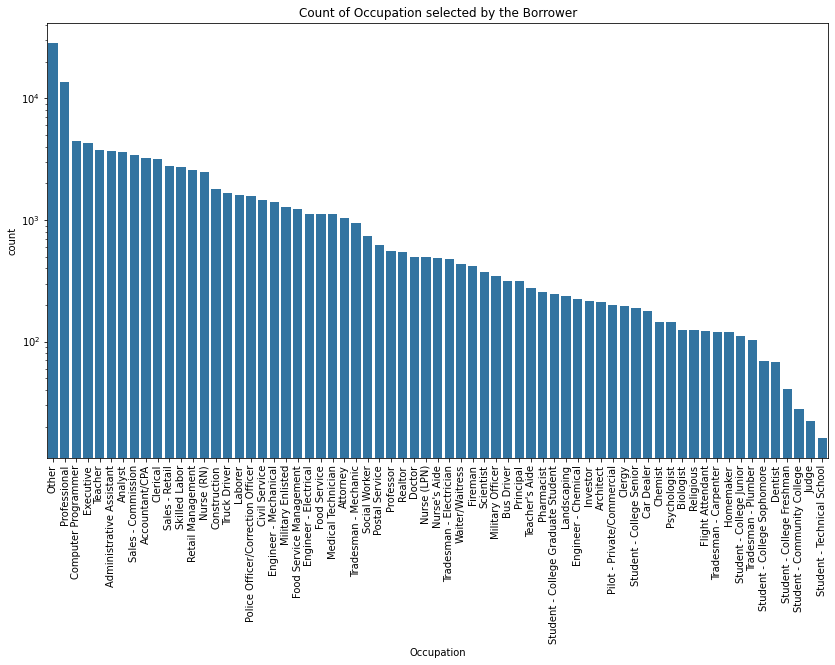

In [16]:
plt.subplots(figsize = [14,8])
type_order = selected_data['Occupation'].value_counts().index
g = sns.countplot(data=selected_data, x='Occupation', color=base_color, order=type_order);
plt.xticks(rotation=90)
plt.title('Count of Occupation selected by the Borrower');
g.set(yscale="log"); 

>Because I noted huge variance between highest and lowest counts. I used **Log Scale** in my chart
<br><br>
I found The most common Occupation is **‘Others’**  then **‘Professional’**, and not give us meaningful information so we will skip them and move to next ones we found that **‘computer programmer’**,**’Excutives’**, **‘Teacher’**, **'Administrative Assistant'**, and **'Analyst'**.




|Occupation          |             frequency|
| --- | ----- |
|Computer Programmer   |       4478|
|Executive              |      4311|
|Teacher               |       3759|
|Administrative Assistant  |   3688|
|Analyst              |        3602|
|Sales - Commission   |        3446|
|Accountant/CPA       |        3233|
|Clerical            |         3164|

>Next up, the first predictor variable of interest: **DebtToIncomeRatio**
<br/><br/>
**DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

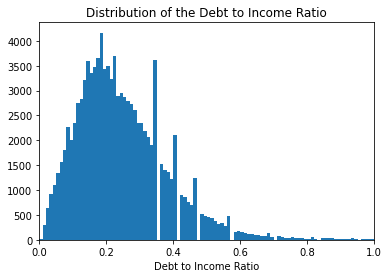

In [17]:
in_bins = np.arange(selected_data.DebtToIncomeRatio.min(), selected_data.DebtToIncomeRatio.max()+0.01, 0.01)
plt.hist(data=selected_data, x='DebtToIncomeRatio', bins=in_bins);
plt.xlim(0,1);
plt.xlabel('Debt to Income Ratio');
plt.title('Distribution of the Debt to Income Ratio');

>The distribution of the DebtToIncomeRatio was highly skewed by the presence of those with very high incomes to their debt. This isn't unexpected in a real-world scenario and no changes to the data were performed to account for this. It will be interesting to see how this affects the interest rates of the loans.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The distribution of Borrower Rate appears as normally distributed with a slight left skew. A small peak centered at 15%, a large peak centered at 30%, and a median found between them. There is also a small peak centered 30%. Additionally, and it's observed a few loans have a Borrower Rate greater than 35%.
<br><br>
There isn't need to implement any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>The distribution of the **DebtToIncomeRatio** was highly skewed by the presence of those with very high incomes to their debt. This isn't unexpected in a real-world scenario and does not need transformations implemented on data. just I limit x-axis to focus on distribution


>For all of the bar charts that I used  I reorded rank of them descending. So it's easy to detect the most common.

>In **occpution** chart, I noted huge variance between highest and lowest counts. I used Log Scale in my chart



## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [18]:
numeric_vars = selected_data.select_dtypes(include='number').columns
categoric_vars = ['Term', 'EmploymentStatus', 'ProsperRating (Alpha)']


**What's pairwise correlations present between features in the data?**

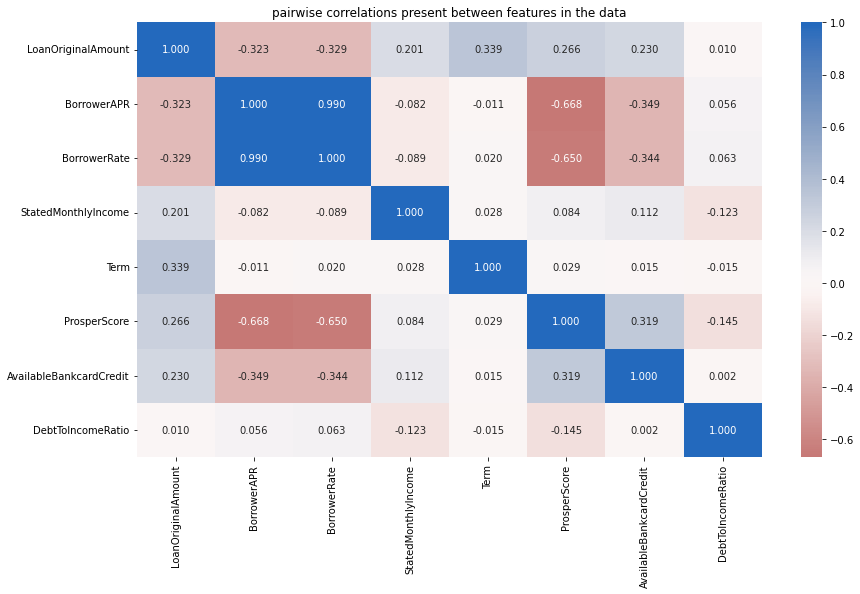

In [19]:
# correlation plot
plt.figure(figsize = [14, 8])
sns.heatmap(selected_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("pairwise correlations present between features in the data")
plt.show()

**How All numeric features behavior with All categorical features**

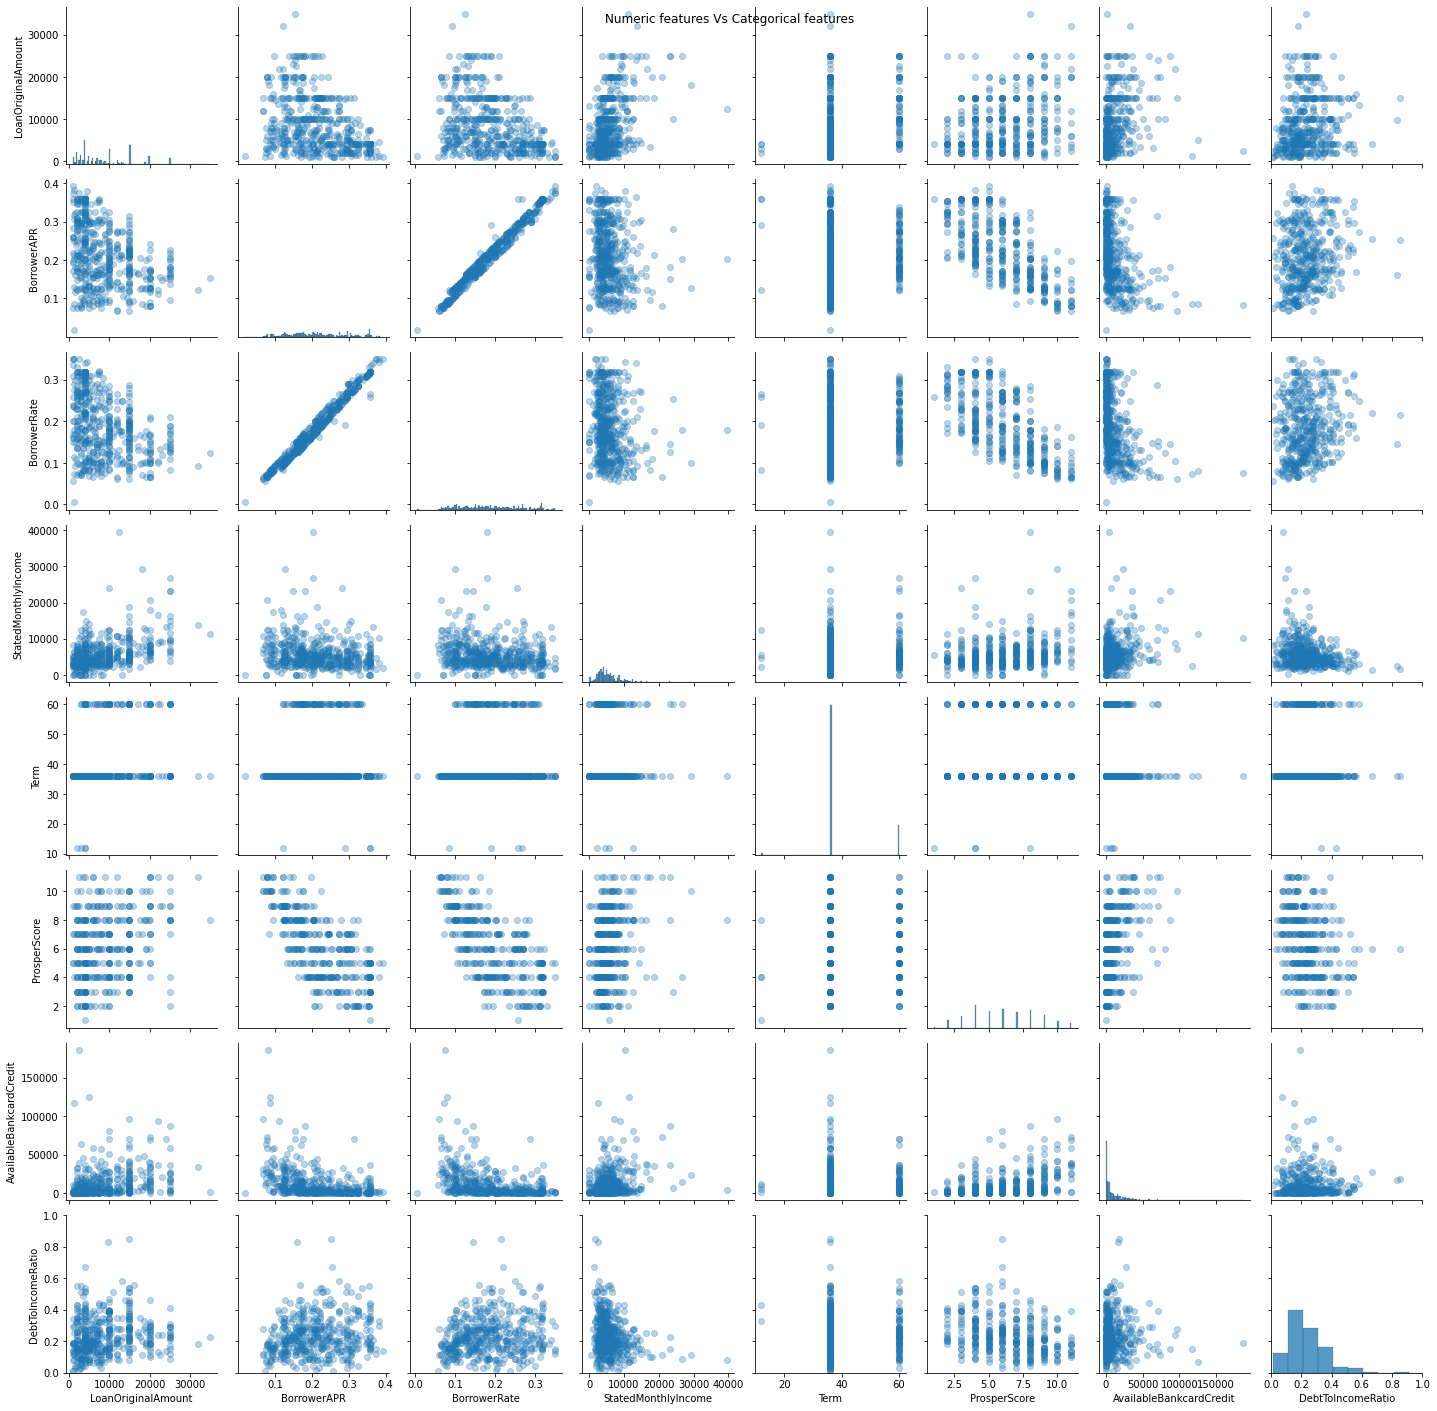

In [20]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(selected_data.shape[0], 500, replace = False)
loans_samp = selected_data.loc[samples,:]

g = sns.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(sns.histplot, bins=100);
g.map_offdiag(plt.scatter, alpha=0.3);
g.axes[7,7].set_xlim(0,1);
g.axes[7,7].set_ylim(0,1);
g.fig.suptitle('Numeric features Vs Categorical features');

>BorrowerRate and BorrowerAPR have a great correlation between them, which makes sense since those values for a loan are similar to each other with a few diffrance, and we observe also that ProsperScore and ProsperRating have a great correlation to loan interest  <br>
The total loan amount has a high positive correlation with the stated monthly income, it makes sense which rich people have a higher probability to borrow loans with more money rather than poor people who has small monthly income.


**How BorrowerRate & ProsperScore behavior with categorical features?**

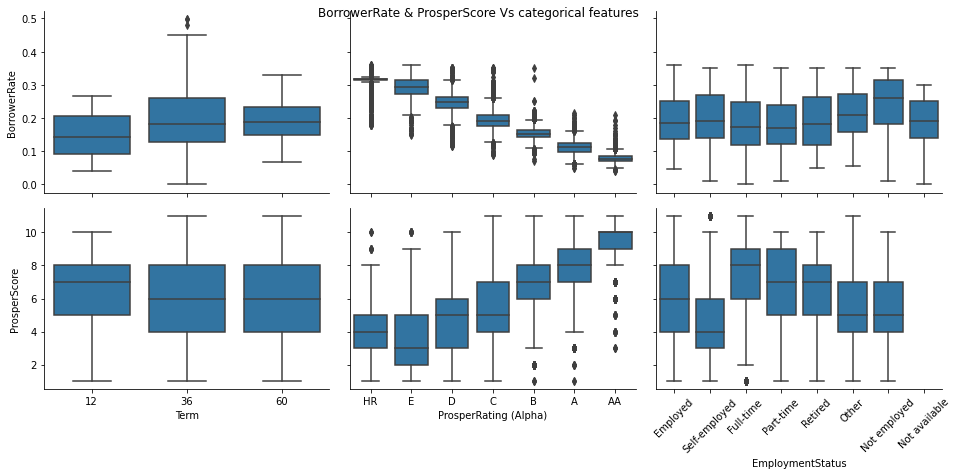

In [21]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)


g = sns.PairGrid(selected_data,y_vars = ['BorrowerRate','ProsperScore',], 
                                x_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus'], height = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=45);
g.fig.suptitle('BorrowerRate & ProsperScore Vs categorical features');
plt.show();

>Looking at the box plots for the distribution of the different credit risks annd the BorrowerRate is that there is a negative correlation between having a higher (better) score and a lower interest rate. This is once again most pronouced in the results for the ProsperRating (Alpha) variable where the decline is steeper. With the ProsperScore there is still a decilne, but the distribution of the BorrowerRate is more distributed and the IQR is genrally larger for each rating.

**What's relationship between Term and the CreditGrade/ProsperRating(s) and ProsperScore ?**

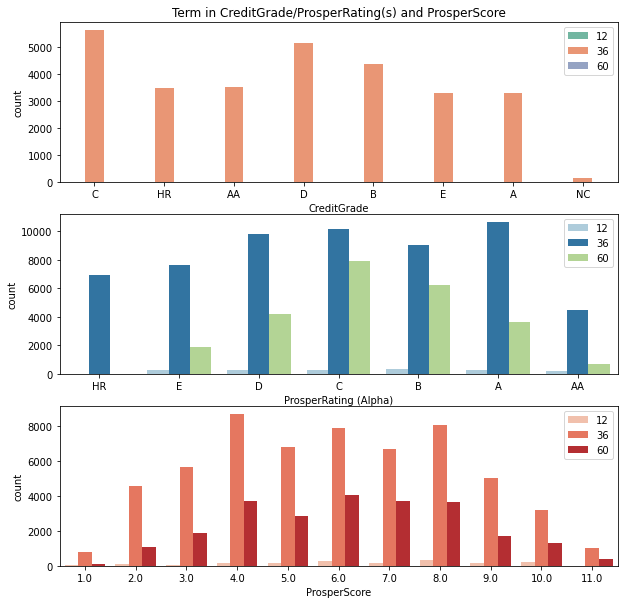

In [22]:
# Look at relationship between Term and the CreditGrade/ProsperRating(s) and ProsperScore
plt.figure(figsize=[10,10])



plt.subplot(3,1,1)
sns.countplot(data=selected_data, x='CreditGrade', hue='Term', palette='Set2');
plt.legend(loc=1);
plt.title("Term in CreditGrade/ProsperRating(s) and ProsperScore");

plt.subplot(3,1,2)
sns.countplot(data=selected_data, x='ProsperRating (Alpha)', hue='Term', palette='Paired');
plt.legend(loc=1);


plt.subplot(3,1,3)
sns.countplot(data=selected_data, x='ProsperScore', hue='Term', palette='Reds');
plt.legend(loc=1);


>Interestingly, it appears that there are some positive relationships between the categorical variables and the two numeric variables of interest. The loans with 60-month term loans were quite popular with those with a ProsperRating of A and C. As seen before 36-month term loans are the most popular across all credit risk groups.

**What's relation between Loan Original Amount and Borrower APR?**

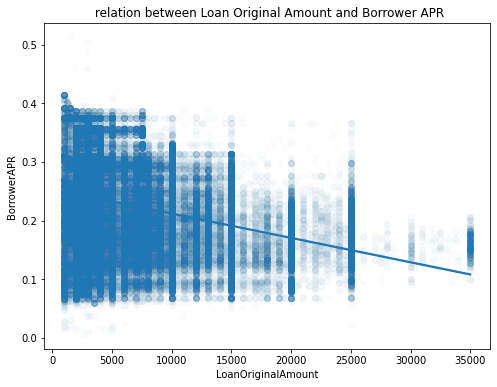

In [23]:
plt.figure(figsize = [8, 6])
sns.regplot(data = selected_data, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':1/50});
plt.title(" relation between Loan Original Amount and Borrower APR");

>This graph observed that at the different sizes of the total loan amount, the borrower's APR has a large distribution, but the range of APR decreases with the increase of loan amount. So the borrower's APR is negatively correlated with the total loan amount.

**What's most common Employment Status in each Prosper Rating ?**

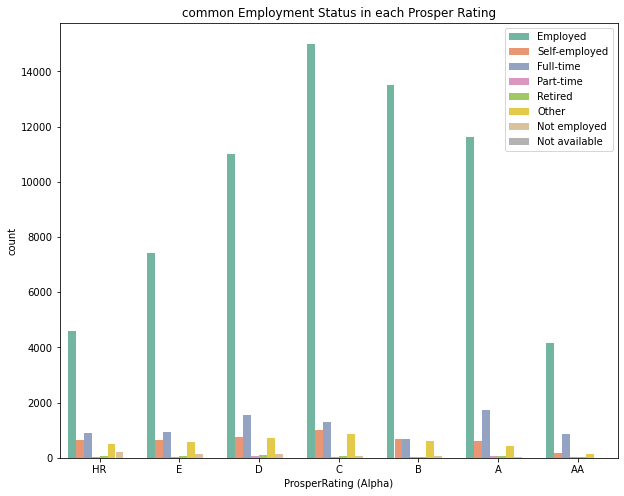

In [24]:
plt.figure(figsize = [10, 8])
sns.countplot(data=selected_data, x='ProsperRating (Alpha)', hue='EmploymentStatus', palette='Set2');
plt.legend(loc=1);
plt.title("common Employment Status in each Prosper Rating");

>Lower ratings were noted to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired, and Part-Time.

**What's correlation between (CreditGrade, the ProsperRating, and ProsperScore) to BorrowerRate  ?**

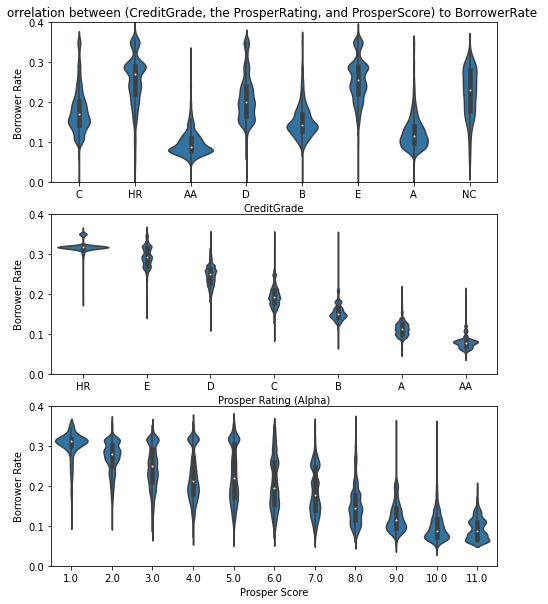

In [25]:
plt.figure(figsize=[8,10])
plt.subplot(3,1,1)
sns.violinplot(data=selected_data, x='CreditGrade', y='BorrowerRate', color=base_color);
plt.ylim((0,0.4));
plt.xlabel("CreditGrade");
plt.ylabel("Borrower Rate");
plt.title("orrelation between (CreditGrade, the ProsperRating, and ProsperScore) to BorrowerRate ");


plt.subplot(3,1,2)
sns.violinplot(data=selected_data, x='ProsperRating (Alpha)', y='BorrowerRate', color=base_color);
plt.ylim((0,0.4));
plt.xlabel("Prosper Rating (Alpha)");
plt.ylabel("Borrower Rate");

plt.subplot(3,1,3)
sns.violinplot(data=selected_data, x='ProsperScore', y='BorrowerRate', color=base_color);
plt.ylim((0,0.4));
plt.xlabel("Prosper Score");
plt.ylabel("Borrower Rate");

>Violin plots show the distribution of the different credit risks and the BorrowerRate is that there is a negative correlation between having a higher score and a lower interest rate. This is once again most pronounced in the results for the ProsperRating (Alpha) variable where the decline is steeper. With ProsperScore there is still a decline, but the distribution of the BorrowerRate is more distributed and the IQR is generally larger for each rating.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>distribution of the different credit risks annd the BorrowerRate is that there is a negative correlation between having a higher (better) score and a lower interest rate. This is once again most pronouced in the results for the ProsperRating (Alpha) variable where the decline is steeper. With the ProsperScore there is still a decilne, but the distribution of the BorrowerRate is more distributed and the IQR is genrally larger for each rating.
<br>
the different sizes of the total loan amount, the borrower's APR has a large distribution, but the range of APR decreases with the increase of loan amount. So the borrower's APR is negatively correlated with the total loan amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Some positive relationships between the categorical variables and the two numeric variables of interest. The loans with 60-month term loans were quite popular with those with a ProsperRating of A and C. As seen before 36-month term loans are the most popular across all credit risk groups.
<br><br>
I was confused about how the DebtToIncomeRatio had no meaningful relation to the interest rate columns. The other features were easy to the expectation.

## Multivariate Exploration

The main thing I want to explore in thestated monthly income and loan original amount variables effect on ProsperRating (Alpha) .

**How the stated monthly income and loan original amount variables effect on ProsperRating (Alpha) ?**

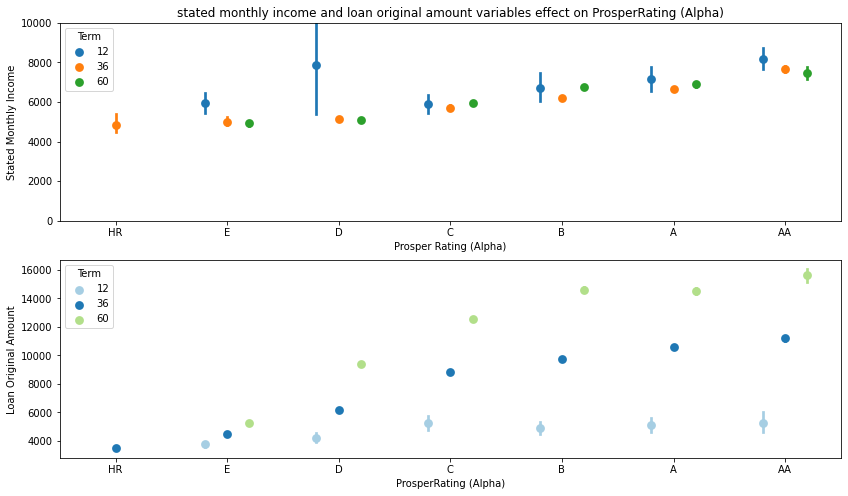

In [26]:
plt.figure(figsize=[14,8])
plt.title('rating and the term affect on stated monthly income and loan original amount');
plt.subplot(2,1,1)
sns.pointplot(data = selected_data, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'tab10', linestyles = '', dodge = 0.4)
plt.title("stated monthly income and loan original amount variables effect on ProsperRating (Alpha)");
plt.xlabel("Prosper Rating (Alpha)");
plt.ylabel("Stated Monthly Income");

plt.ylim(0,10000);
plt.subplot(2,1,2)
sns.pointplot(data = selected_data, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Paired', linestyles = '', dodge = 0.4);
plt.xlabel("ProsperRating (Alpha)");
plt.ylabel("Loan Original Amount");

>About stated monthly income, it doesn't seem like there is an interaction effect between term and rating, the pattern of the term is similar among different ratings. But for the loan amount, there is an interaction between term and rating. We can see that with a better Prosper rating, the loan amount of all three terms increases, the increased amplitude of loan amount between terms also becomes larger.

**How The rating and term affect on Borrower APR ?**

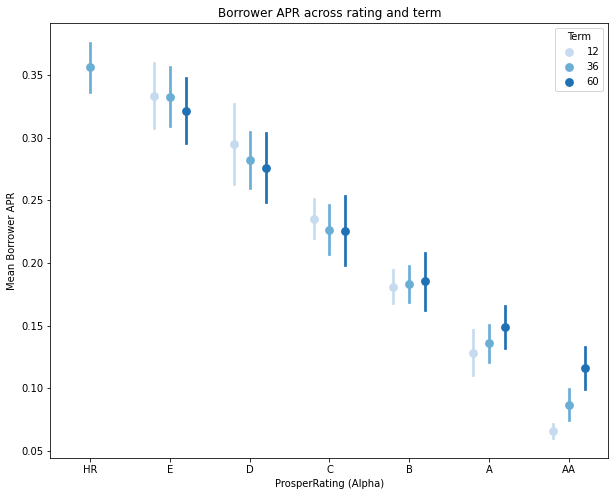

In [27]:
plt.figure(figsize = [10,8])
sns.pointplot(data = selected_data, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR');

>Interestingly, the borrower APR decreases with the increase of borrow term for people with HR &  C ratings. But for people with B & AA ratings, the APR increase with the increase of borrow term.

**how Prosper rating effect on relationship of APR and loan amoun?**

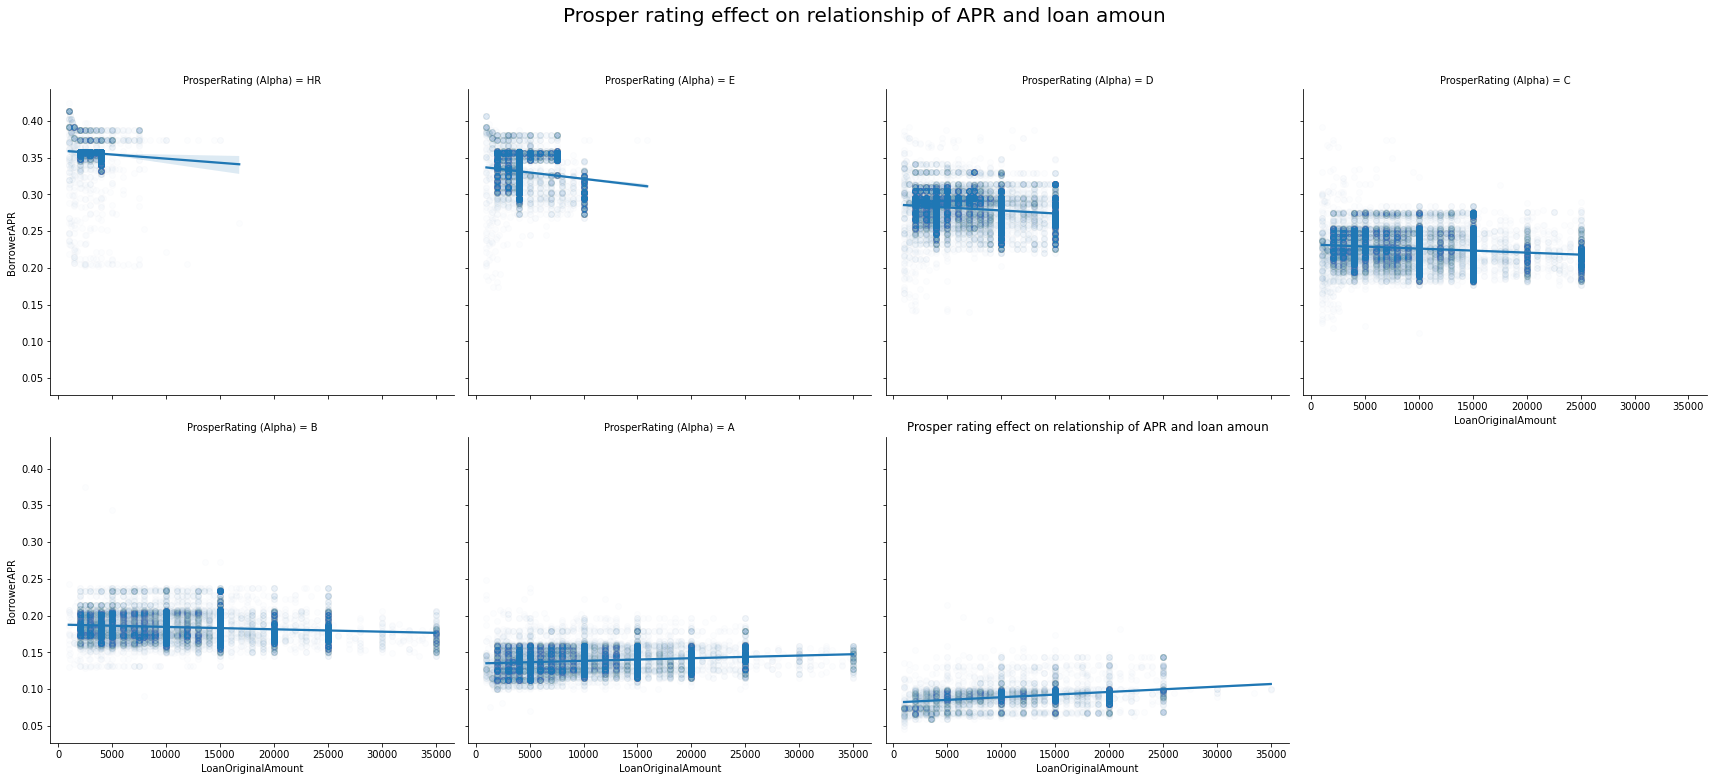

In [28]:
# Prosper rating effect on relationship of APR and loan amount
g=sns.FacetGrid(data=selected_data, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.01});
plt.title('Prosper rating effect on relationship of APR and loan amoun');
g.fig.suptitle('Prosper rating effect on relationship of APR and loan amoun', fontsize=20, y=1.08);
g.add_legend();

>The loan amount increases with the best rating. The borrower's APR decreases with the best rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or higher. This may be because people with A or AA ratings tend to borrow more money, increasing the borrower's APR could prevent them borrow even more and maximizing the profit. But people with lower ratings tend to borrow less money, decreasing the borrower's APR could encourage them to borrow more.

>Finally, let's look at relationships between the three categorical features.<br><br>
**how the BorrowerRate changes for different loan Terms when split up by ProsperRating?**

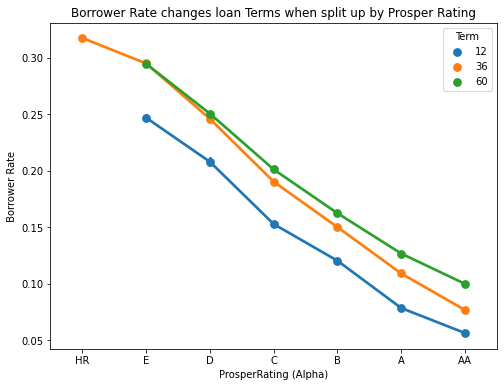

In [29]:
# Create a pointplot to show how the BorrowerRate changes for different loan Terms
# when split up by ProsperRating
plt.figure(figsize=[8,6])

sns.pointplot(data=selected_data, x='ProsperRating (Alpha)', y='BorrowerRate', hue='Term',
                   palette='tab10');
plt.legend(loc=1, title='Term');
plt.title('Borrower Rate changes loan Terms when split up by Prosper Rating');
plt.ylabel(' Borrower Rate ');

>This seems to not make sense but for every single level of the ProsperRating, the BorrowerRate increases as for longer-term loans. I would think it to be the reverse as shorter-term loans usually carry a higher interest rate. This was not at all evident in the bivariate analysis and comes a bit as a surprise. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>**During investing the ProsperRating (Alpha) and the ProsperScore as it relates to the BorrowerRate I could know an explanation for why the ProsperScore wasn't as highly correlated to the BorrowerRate. It is opposite the other credit risk features must use different criteria in coming up with its value.**

### Were there any interesting or surprising interactions between features?

>**A surprising interaction is that the borrower's APR and loan amount is negative correction when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decreases with the increase of borrow term for people with HR-C ratings. But for people with B-AA ratings, the borrower's APR increase with the borrowing term.**
<br><br>
**BorrowerRate increases for longer Term loans when split up by ProsperRating (Alpha). The opposite relationship would be expected as longer-term loans generally carry a lower risk profile and have a longer time to accrue interest.**